In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

In [19]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [20]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [22]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[0])
    plt.xlabel(classes[y[index]])

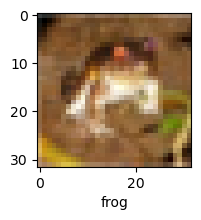

In [23]:
plot_sample(X_train, y_train, 0)

In [24]:
X_train = X_train/255
X_test = X_test/255

In [30]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8122 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6254 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5411 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4826 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4333 - accuracy: 0.4956


In [31]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5853 - accuracy: 0.4209


[1.5853205919265747, 0.42089998722076416]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.47      0.52      1000
           1       0.68      0.37      0.48      1000
           2       0.54      0.06      0.10      1000
           3       0.44      0.09      0.15      1000
           4       0.43      0.43      0.43      1000
           5       0.31      0.55      0.39      1000
           6       0.62      0.37      0.47      1000
           7       0.42      0.60      0.50      1000
           8       0.69      0.42      0.53      1000
           9       0.29      0.85      0.43      1000

    accuracy                           0.42     10000
   macro avg       0.50      0.42      0.40     10000
weighted avg       0.50      0.42      0.40     10000



In [35]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
cnn.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 4ms/step - loss: 1.4489 - accuracy: 0.4826
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0971 - accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9755 - accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8984 - accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8299 - accuracy: 0.7109
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7801 - accuracy: 0.7298
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7304 - accuracy: 0.7454
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6873 - accuracy: 0.7615
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6483 - accuracy: 0.7742
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.60

In [39]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9927 - accuracy: 0.6832


[0.9926583170890808, 0.6832000017166138]

In [40]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

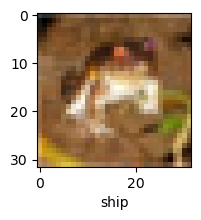

In [41]:
plot_sample(X_test, y_test, 1)

In [42]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.3427129e-04, 1.4747108e-05, 2.3250861e-04, 8.7013888e-01,
        2.1735420e-03, 1.0867892e-01, 1.7832194e-02, 1.5366284e-04,
        4.3878856e-04, 2.4000890e-06],
       [5.1403226e-04, 1.1131327e-02, 1.7525631e-06, 2.7078117e-06,
        5.6493150e-08, 5.1452091e-09, 1.6028295e-08, 6.3391688e-08,
        9.8697215e-01, 1.3779274e-03],
       [5.1940933e-02, 3.0939391e-01, 1.0534561e-03, 1.4172609e-02,
        2.3157587e-03, 3.1162936e-03, 3.0737347e-04, 6.5054270e-03,
        2.6547274e-01, 3.4572148e-01],
       [6.7525077e-01, 1.7677487e-01, 1.9184632e-02, 3.8032714e-02,
        2.8757099e-03, 6.7751808e-04, 2.6665723e-03, 2.9110746e-03,
        7.9556130e-02, 2.0700016e-03],
       [4.4698809e-09, 4.5343265e-07, 5.4914621e-03, 1.1164565e-02,
        7.3502737e-01, 2.0174100e-03, 2.4629411e-01, 3.3242520e-06,
        1.2264686e-06, 1.5775482e-08]], dtype=float32)

In [51]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 4]

In [52]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

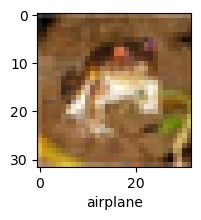

In [53]:
plot_sample(X_test, y_test, 3)

In [54]:
classes[y_classes[3]]

'airplane'

In [55]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.69      0.74      1000
           1       0.89      0.67      0.76      1000
           2       0.62      0.54      0.58      1000
           3       0.49      0.47      0.48      1000
           4       0.64      0.65      0.65      1000
           5       0.57      0.67      0.61      1000
           6       0.65      0.84      0.73      1000
           7       0.72      0.77      0.75      1000
           8       0.89      0.71      0.79      1000
           9       0.68      0.82      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

